In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
crop=pd.read_csv('crop.csv')
fert=pd.read_csv('fertilizer.csv')


### Basic info

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
print("\n=== Basic Information Crop ===")
print(f"Shape: {crop.shape}")
print(f"\nData Types:\n{crop.dtypes}")
print(f"\nMissing Values:\n{crop.isnull().sum()}")
print(f"\nDuplicate Rows: {crop.duplicated().sum()}")


=== Basic Information Crop ===
Shape: (2200, 8)

Data Types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicate Rows: 0


In [6]:
print("\n=== Basic Information Fertilizer ===")
print(f"Shape: {fert.shape}")
print(f"\nData Types:\n{fert.dtypes}")
print(f"\nMissing Values:\n{fert.isna().sum()}")
print(f"\nDuplicate Rows: {fert.duplicated().sum()}")


=== Basic Information Fertilizer ===
Shape: (99, 9)

Data Types:
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

Missing Values:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

Duplicate Rows: 0


In [7]:
fert.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,99.0,30.282828,3.502304,25.0,28.0,30.0,33.0,38.0
Humidity,99.0,59.151515,5.840331,50.0,54.0,60.0,64.0,72.0
Moisture,99.0,43.181818,11.271568,25.0,34.0,41.0,50.5,65.0
Nitrogen,99.0,18.909091,11.599693,4.0,10.0,13.0,24.0,42.0
Potassium,99.0,3.383838,5.814667,0.0,0.0,0.0,7.5,19.0
Phosphorous,99.0,18.606061,13.476978,0.0,9.0,19.0,30.0,42.0


In [8]:
crop.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


### Exploring data

In [9]:
corr=crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

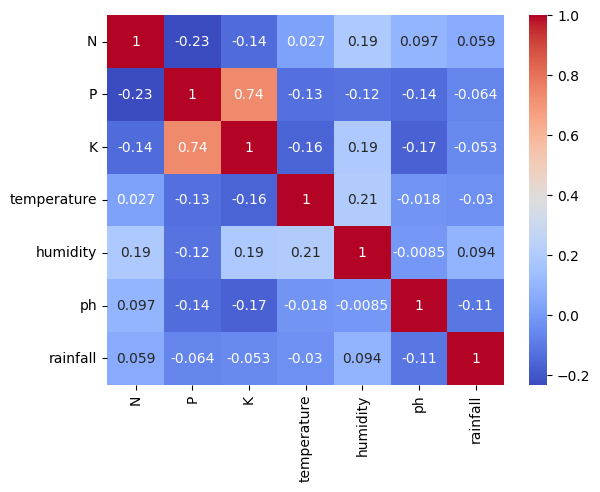

In [10]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [11]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

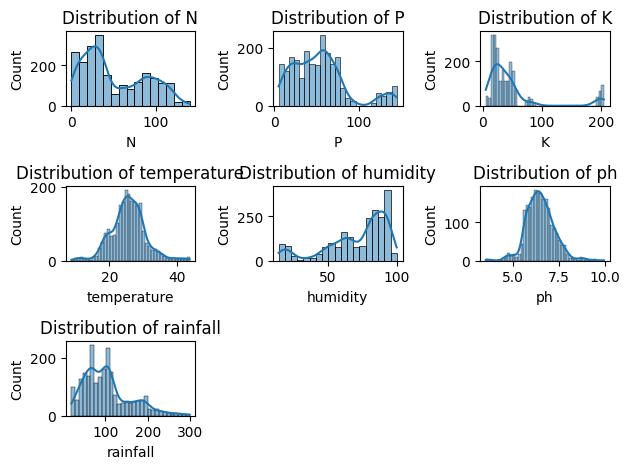

In [12]:
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(crop[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

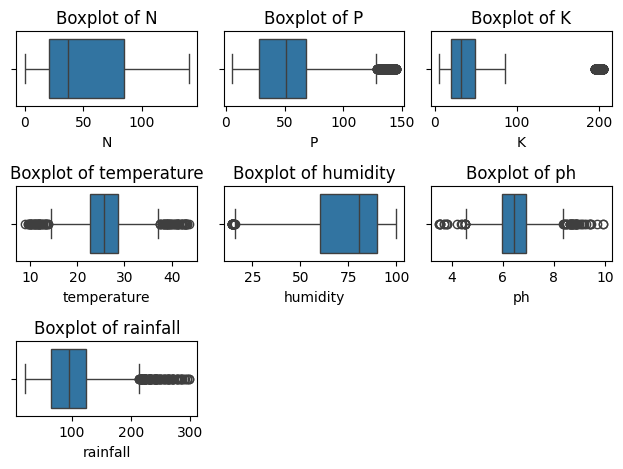

In [13]:
for i, col in enumerate(num_cols, 1):  
    plt.subplot(3, 3, i)  
    sns.boxplot(x=crop[col])  
    plt.title(f"Boxplot of {col}")  
plt.tight_layout()  
plt.show()


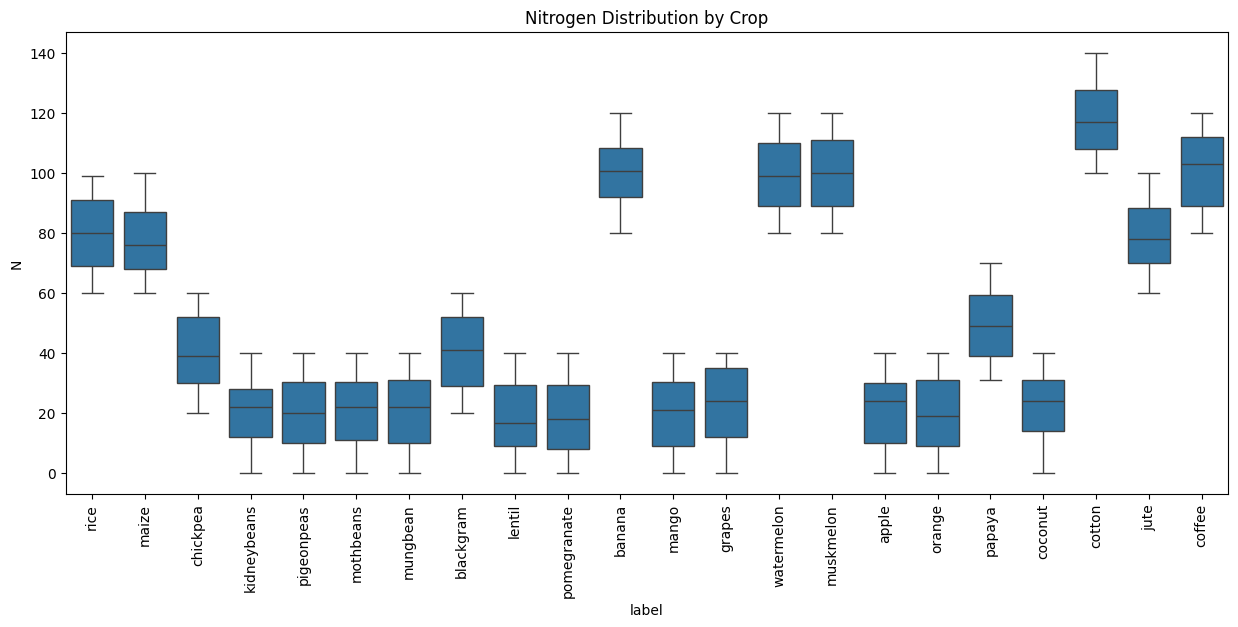

In [14]:
# Boxplot of Nutrients by Crop
plt.figure(figsize=(15, 6))
sns.boxplot(x='label', y='N', data=crop)
plt.xticks(rotation=90)
plt.title("Nitrogen Distribution by Crop")
plt.show()


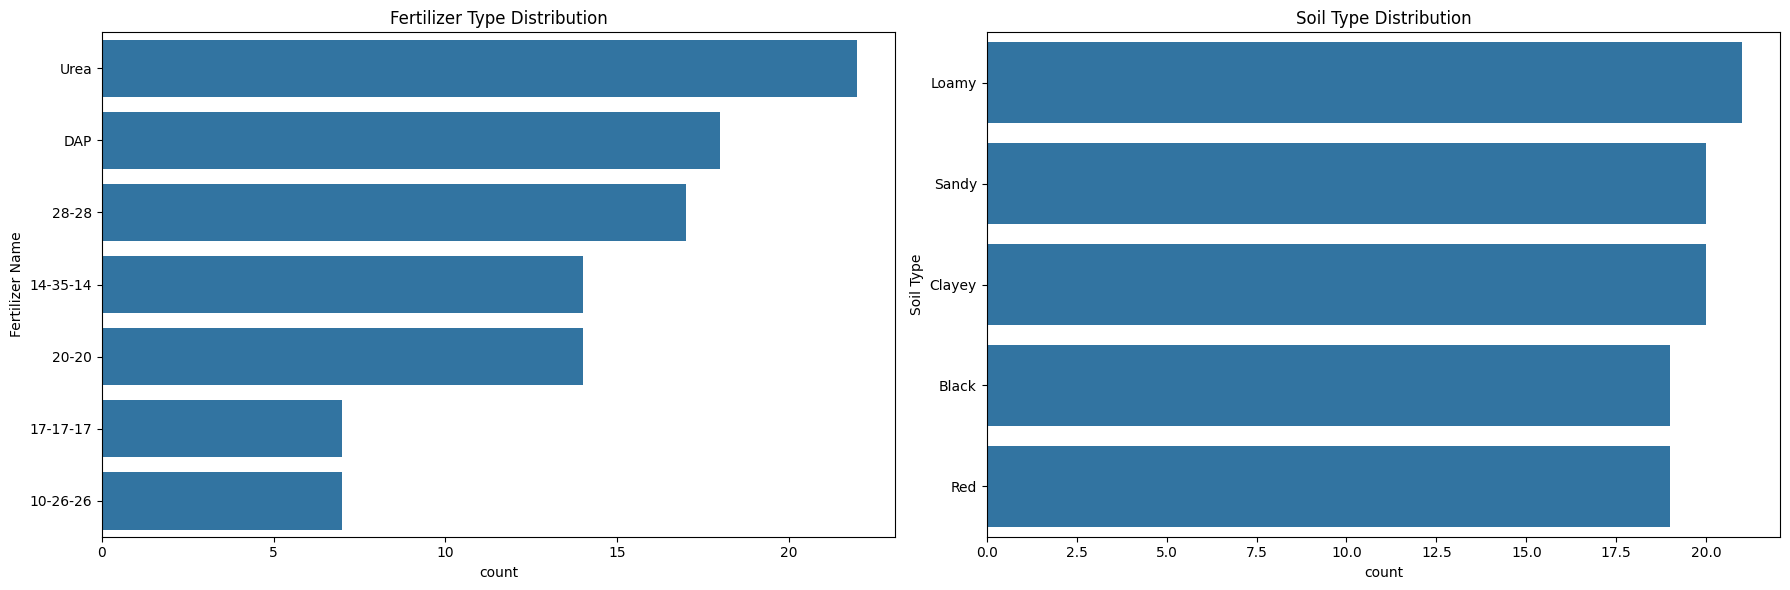

In [15]:
plt.figure(figsize=(18, 6))

# Fertilizer Type Distribution
plt.subplot(1, 2, 1)
sns.countplot(y='Fertilizer Name', data=fert, order=fert['Fertilizer Name'].value_counts().index)
plt.title("Fertilizer Type Distribution")

# Soil Type Distribution
plt.subplot(1, 2, 2)
sns.countplot(y='Soil Type', data=fert, order=fert['Soil Type'].value_counts().index)
plt.title("Soil Type Distribution")
plt.tight_layout()
plt.show()

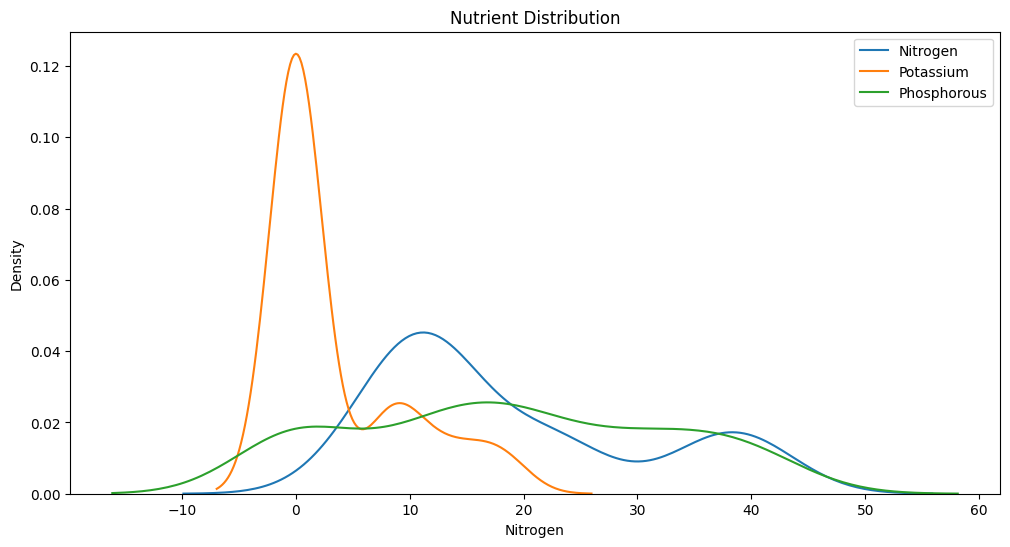

In [16]:
# Nutrient Relationships
nutrient_cols = ['Nitrogen', 'Potassium', 'Phosphorous']
plt.figure(figsize=(12, 6))
for col in nutrient_cols:
    sns.kdeplot(fert[col], label=col)
plt.title("Nutrient Distribution")
plt.legend()
plt.show()

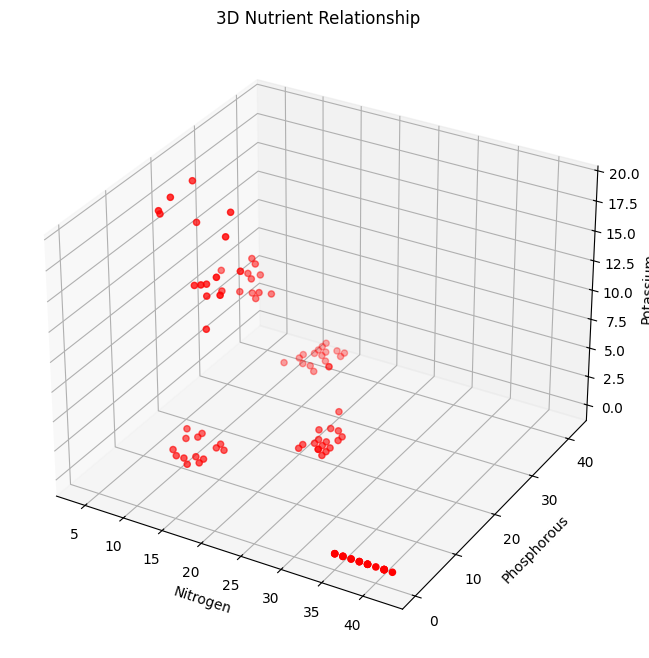

In [17]:
# 3D Scatterplot for Nutrients
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fert['Nitrogen'], fert['Phosphorous'], fert['Potassium'], c='r', marker='o')
ax.set_xlabel('Nitrogen')
ax.set_ylabel('Phosphorous')
ax.set_zlabel('Potassium')
plt.title("3D Nutrient Relationship")
plt.show()

### encoding

In [18]:
crop_dict={
    'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomegranate':14,
    'lentil':15,
    'blackgram':16,
    'mungbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22
}
crop['crop_num']=crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [19]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [20]:
crop.drop('label',axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [21]:
fert.nunique()  # Counts unique values per column


Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

### Train and testing

In [22]:
X=crop.drop('crop_num',axis=1)
y=crop['crop_num']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
}

# Train-test split
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Dictionary to store trained models and their accuracy scores
trained_models = {}
accuracy_scores = {}
# Initialize metrics as a dictionary of lists
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_crop, y_train_crop)
    
    # Predictions
    preds = model.predict(X_test_crop)
    
    # Compute metrics
    accuracy = accuracy_score(y_test_crop, preds)
    precision = precision_score(y_test_crop, preds, average="weighted")
    recall = recall_score(y_test_crop, preds, average="weighted")
    f1 = f1_score(y_test_crop, preds, average="weighted")
    
    # Store results
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)
    
    print(f"{name} - Accuracy: {accuracy:.2%}, Precision: {precision:.2%}, Recall: {recall:.2%}, F1-Score: {f1:.2%}")

Training RandomForest...
RandomForest - Accuracy: 99.32%, Precision: 99.37%, Recall: 99.32%, F1-Score: 99.32%
Training DecisionTree...
DecisionTree - Accuracy: 98.64%, Precision: 98.68%, Recall: 98.64%, F1-Score: 98.63%
Training GradientBoosting...
GradientBoosting - Accuracy: 98.18%, Precision: 98.43%, Recall: 98.18%, F1-Score: 98.19%
Training SVM...
SVM - Accuracy: 96.14%, Precision: 96.73%, Recall: 96.14%, F1-Score: 96.12%


In [25]:
best_accuracy = max(metrics["Accuracy"])
best_model_index = metrics["Accuracy"].index(best_accuracy)
selected_model = list(models.values())[best_model_index]

# Save the best performing model
joblib.dump(selected_model, 'best_crop_model.pkl')

['best_crop_model.pkl']

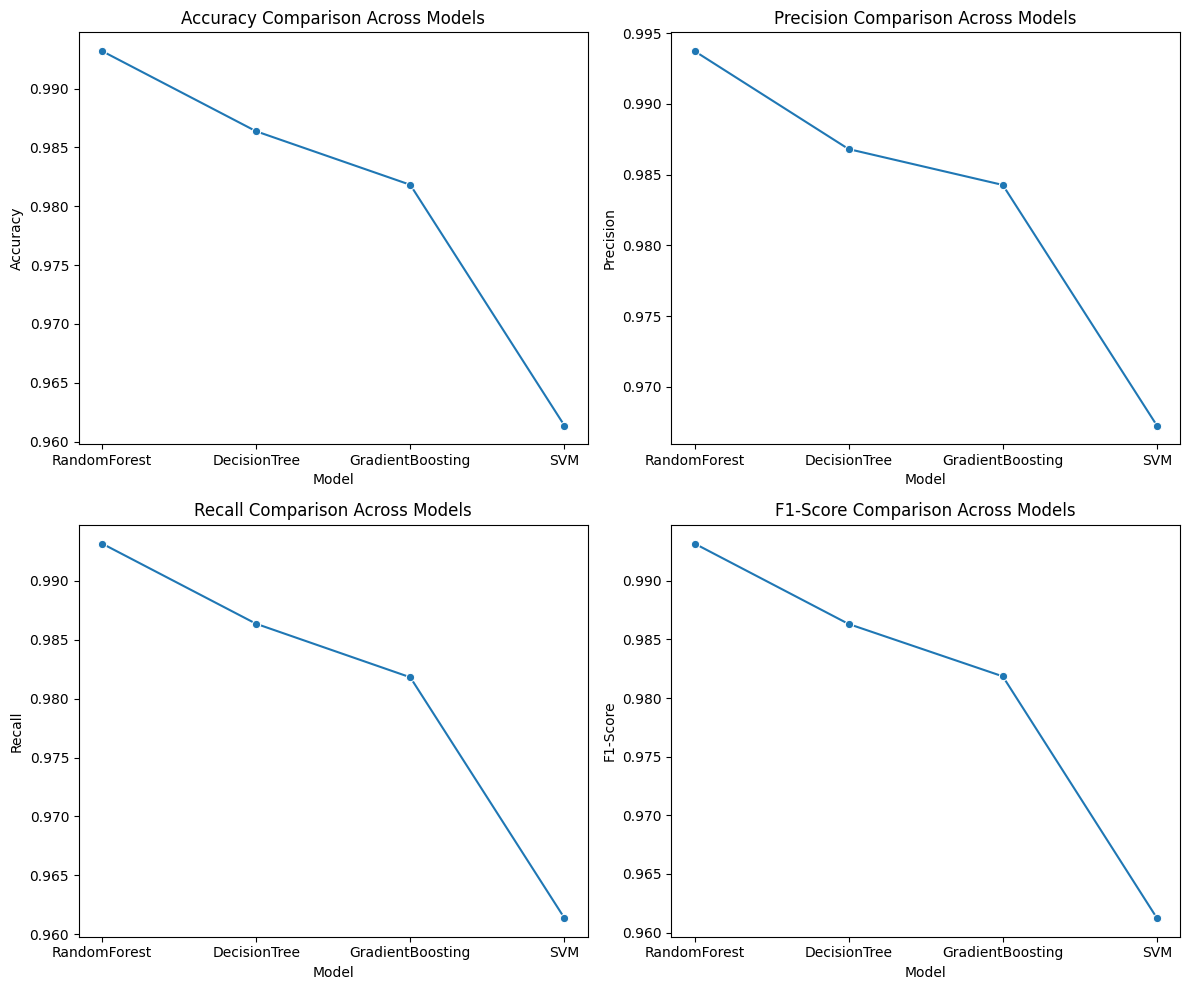

In [26]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for i, metric in enumerate(metrics):
    sns.lineplot(ax=axes[i//2, i%2], x="Model", y=metric, data=metrics_df, marker="o")
    axes[i//2, i%2].set_title(f"{metric} Comparison Across Models")
plt.tight_layout()
plt.show()


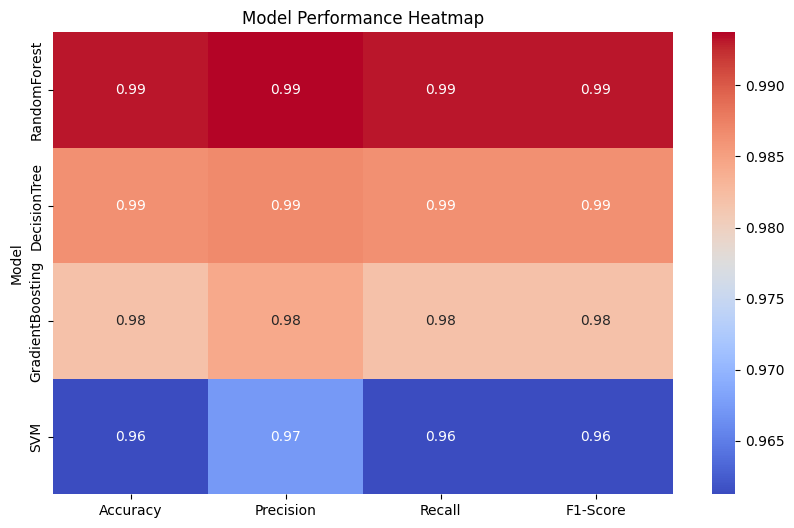

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.show()
